In [232]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [233]:
# Read in data into a dataframe 
data = pd.read_csv('C:/Users/Administrator/Desktop/机器学习/HH.csv')

In [234]:
y  = np.array(data['y']) 

In [235]:
# Read in data into a dataframe 
dataset = pd.read_csv('C:/Users/Administrator/Desktop/机器学习/HH1.csv')


In [236]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.2)

In [237]:

print(X_train.shape)  # (404, 13)
print(X_test.shape)  # (102, 13)
print(y_train.shape)  # (404, )
print(y_test.shape)  # (102, )


(564, 18)
(141, 18)
(564,)
(141,)


In [238]:
y_te =pd.Series(y_test)
y_te.to_csv('C:/Users/Administrator/Desktop/机器学习/RNN/y_te15.csv', index = False)

In [239]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np




In [240]:
x_train = np.array(X_train)
x_test = np.array(X_test)




x_train_ = torch.Tensor(x_train)
y_train_ = torch.Tensor(y_train)
dataset_train = torch.utils.data.TensorDataset(x_train_, y_train_)
data_iter_train = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=True)

x_test_ = torch.Tensor(x_test)
x_test_1 = x_test_.unsqueeze(1)  # Expand the dimension




0.001439130347636011
0.0028445012867450714
0.001452491825653447
0.0006346630656884776
0.0002965961531218555
0.0024012687305609384
0.0003278894970814387
0.00042399011241892975
0.0009278061075343026
0.0005713448756270938
0.0012239925563335419
0.00034007000633411936
0.0001777048584901624
0.00012011807929310534
0.0003652122751292255
0.00020522065460681915
5.0673794855053224e-05
9.584466978493665e-05
0.00027275121667318873
0.0008562426600191328
0.00010801853042923742
0.00031038373708724976
0.00014742243931525282
0.0002450421452522278
7.225639031579097e-05
6.473715701657865e-05
0.0007089792957736386
0.000220406593547927
0.0006155632436275482
0.0008489962460266219
0.0005408825559748544
0.00010395686452587445
0.0001529651021377908
0.00013818194727516838
6.893951083636946e-05
0.00026022839463419386
5.898592967746986e-05
0.0005134111270308495
0.00012101892692347367
9.52096888795495e-05
0.00013829709496349096
0.00011263213430841763
0.0002563232297284736
0.00023199053895142343
5.435926787969139e-0

2.0231083100144235e-05
9.780346105496089e-05
2.3342219517669742e-05
7.5717243210723e-05
0.0005709721396366755
0.00041210146931310493
7.270458283730679e-05
0.00016915232926193211
0.0002721445893661843
1.8159076312763824e-05
0.0001381150084651179
0.00010082877836086684
0.00019604906750222048
6.229891571112805e-05
6.464521478240688e-05
4.0606731393684946e-05
3.1556552534716e-05
3.413013311930829e-05
0.0001540907606896427
7.741882776220639e-05
0.0002166962820208735
7.540275368632542e-05
0.0003318947274237871
2.93372916833808e-05
0.0003397891867078013
9.61019670487278e-05
8.997826888743375e-05
4.133722136935426e-05
0.00010145871460230814
3.5563467665471966e-05
5.916981414581338e-05
3.065776157503327e-05
0.00015419157635834481
9.608258389764362e-05
8.302452301399576e-05
9.674777457904484e-05
7.536539083553685e-05
0.0001593559928652313
1.9743909231490558e-05
7.566441005716722e-05
5.215445222953955e-05
3.736130505179366e-05
1.4824635905420615e-05
0.00010166986612603068
5.7193405357086e-05
7.81

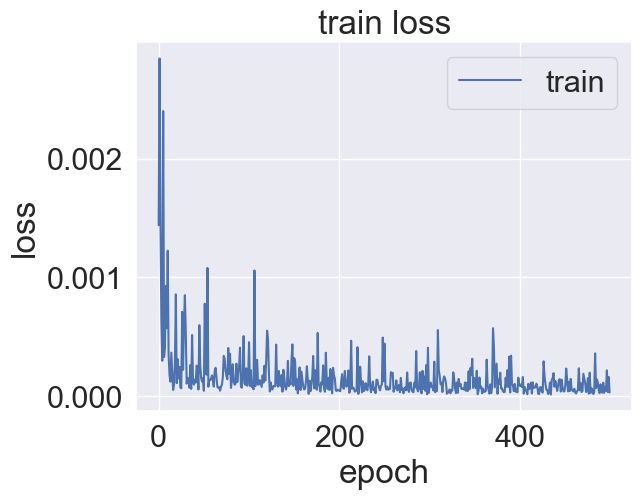

acc test: [100.0]


In [241]:
# Model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.code = nn.Sequential(
            # Number of output channels==number of convolutional kernels, convolution ->BN ->activation ->pooling
            nn.Conv1d(in_channels=1, out_channels=10, kernel_size=3, stride=1),  # (1,13)--> (10,11)
            nn.BatchNorm1d(10),
            nn.ReLU(True),
            nn.MaxPool1d(kernel_size=3, stride=1),  # (10,11)-->(10,9)

            nn.Conv1d(in_channels=10, out_channels=20, kernel_size=3, stride=1),  # (10,9)-->(20,7)
            nn.BatchNorm1d(20),
            nn.ReLU(True),
            nn.MaxPool1d(kernel_size=3, stride=1),  # (20,7)-->(20,5)

            # 展平
            nn.Flatten(),
            nn.Linear(in_features=200, out_features=50),
            nn.Linear(in_features=50, out_features=25),
            nn.Linear(in_features=25, out_features=1),
        )

    def forward(self, x):
        x = self.code(x)

        return x


# Model instantiation
net = ConvNet()
# loss function 
criterion = nn.MSELoss()
# optimizer 
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

epochs = 500
loss_train = []
for epoch in range(epochs):
    #  train
    net.train()
    running_loss = 0.0
    for batch_idx, data in enumerate(data_iter_train):
        input_data = data[0]
        # print("1",input_data.shape)
        input_data = input_data.unsqueeze(1)  # Expand the dimension
        # print("2",input_data.shape)
        label = data[1]
        label = label.unsqueeze(1)  # Expand the dimension
        # print("label shape",label.shape)
        output_data = net(input_data)
        # print(output_data)
        # print(output_data.shape)
        loss = criterion(output_data, label)
        # print("loss:",loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    running_loss += loss.item()
    print(running_loss / len(data_iter_train))
    loss_train.append(running_loss / len(data_iter_train))

plt.figure(1)
plt.title('train loss')  # 
plt.xlabel("epoch")  # Horizontal coordinate name
plt.ylabel("loss")  # Vertical coordinate name
plt.plot(np.arange(len(loss_train)), loss_train, label='train')
plt.legend(loc='upper right')
plt.savefig('loss.png', dpi=600)  # Save image
plt.show()

output_test = net(x_test_1)
y_predict = output_test.detach().numpy().reshape(-1)
acc_test = [((np.abs(y_predict - y_test) <= 10.).sum() / x_test_.shape[0]) * 100]
print("acc test:",acc_test)



Text(0, 0.5, 'Measured yeild')

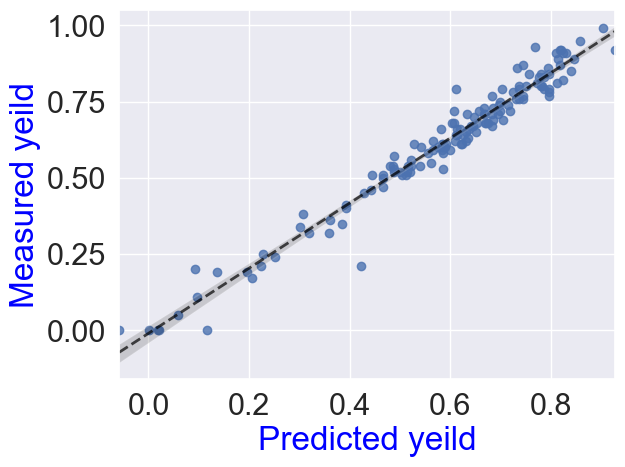

In [242]:
import matplotlib.patches as mpatches
import seaborn as sn
sn.regplot(x=y_predict, y=y_test,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted yeild', color='blue')
plt.ylabel('Measured yeild', color ='blue')

In [243]:

from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
# R^2 (coefficient of determination) regression score function: 
R2_mr =r2_score(y_test, y_predict)

In [244]:
print(R2_mr)

0.9403799310269252


In [245]:
y_predict2=pd.Series(y_predict)

y_predict2.to_csv('C:/Users/Administrator/Desktop/y_predict128csv', index = False)

In [246]:
# Read in data into a dataframe 
P_x = pd.read_csv('C:/Users/Administrator/Desktop/机器学习/f22.csv')

p_x = np.array(P_x)

p_x_ = torch.Tensor(p_x)
p_x_1 = p_x_.unsqueeze(1)  # 扩充维度

p_test = net(p_x_1)

y_pre_ = p_test.detach().numpy().reshape(-1)

y_predict3=pd.Series(y_pre_)

y_predict3.to_csv('C:/Users/Administrator/Desktop/机器学习/pf226.csv', index = False)

In [247]:
import sys
 
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [43]:
cmd /c for /f %I in ('wmic process get Name')do (wmic process where Name="%I" delete)

SyntaxError: invalid syntax (<ipython-input-43-556d9c414041>, line 1)